# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;"><span style="color: white; font-size: 125%; font-weight: bold;">Titanic Survival Prediction</span> </p>
<img src="https://st.depositphotos.com/2569431/2969/i/600/depositphotos_29698885-stock-photo-titanic-oceanliner.jpg" width="350">
<h1 style="font-family: 'poppins'; font-weight: bold; color: red;">👨‍💻Author: Muhammad Danish Mubashar</h1>
Hi Everyone! Welcome to my notebook. 📓

 I'm Data Scientist. I'm passionate about data science, and I'm excited to share my findings with you. 🤓

This is a Titanic Survival Prediction notebook that attempts to perform Exploratory Data Analysis (EDA) on the Titanic Dataset and eventually train a ML Models ( XGBoost,Random Forest) and Deep Learning (Neural Network by TensorFlow) on it and enhance the predictions. 🚢🔍

Let's explore and then make results and discussion to gain deeper insights from our analysis. 💡

If you find this notebook helpful, please consider `upvoting and Follow` ❤️



<span style="color: red; font-size: 100%; font-weight: bold;">If anyone wishes to delve deeper into the subject, kindly follow me through the provided links </span>
* [Kaggle](https://www.kaggle.com/danishmubashar) 
* [Gmail](danish608186@gmail.com) 
* [Linkedin](https://www.linkedin.com/in/muhammad-danish-mubashar-002b912a0/?originalSubdomain=pk)


## ***Meta-Data (About Dataset) :***
- The data have `891` entries on train dataset and `418` on test dataset
- `12` columns in train_csv and `11` columns in test_csv

##### ***Variable Definition	Key***
- **survived**	Survival	0 = No, 1 = Yes
- **pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**	male , female
- **Age**	Age in years	
- **sibsp**	# of siblings / spouses aboard the Titanic	
- **parch**	# of parents / children aboard the Titanic	
- **ticket**	Ticket number	
- **fare**	Passenger fare	
- **cabin**	Cabin number	
- **embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
##### ***Variable Notes***
- ***pclass***: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
- ***Age***: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- ***Sibsp***: The dataset defines family relations in this way
- Sibling  brother, sister, stepbrother, stepsister
- Spouse  husband, wife (mistresses and fiancés were ignored)

- ***parch***: The dataset defines family relations in this way
- ***Parent*** mother, father
- ***Child***  daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## ***Table of Contents***

* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
* [Step 4 | EDA](#EDA)
* [Step 5 | Check Missing Values ](#miss)
* [Step 6 | Impute Missing Values ](#impute)
* [Step 7 | Outliers](#outlier)
* [Step 8 | Machine Learning](#ml)
    - [XGBClassifier](#xg)
    - [RandomForestClassifier](#random)
* [Step 9 | Deep Learning](#deep)
    - [Neural Network by Tensorflow](#random)
* [Step 10 | Submission](#Submission)


<a id="import"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 1 | Import Libraries</span>


In [93]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks

from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from xgboost import XGBClassifier

# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 2 | Read Dataset</span>


In [94]:
# load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
# submission = pd.read_csv('./gender_submission.csv')

<a id="overview"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 3 | Dataset Basic Information</span>


In [95]:
df_train.shape

(891, 12)

In [96]:
df_test.shape

(418, 11)

In [97]:
# chech first rows of the train data
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [98]:
# chech first rows of the test data
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [99]:
# basic information of the train data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


>* Train data have `891` Rows and `12` columns 

In [100]:
# basic information of the test data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


>* Teat data have `418` Rows and `11` columns 

In [101]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [102]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


<a id="EDA"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 4 | Explore Columns</span>

In [103]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## ***4.1 : Survived***

In [104]:
# check value count of Survived 
print(df_train['Survived'].value_counts())
print("----------Train Data----------")


0    549
1    342
Name: Survived, dtype: int64
----------Train Data----------


>* Here `549` are non Survived and `342` Survived

## ***4.2 : Pclass***

In [105]:
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


<Axes: xlabel='Survived', ylabel='count'>

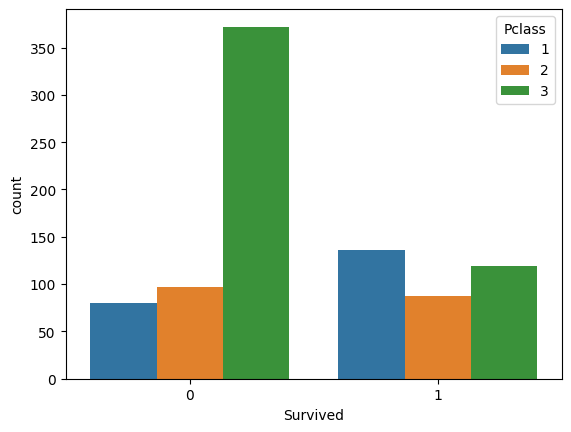

In [106]:
# plot of Survived grouped by pclass
sns.countplot(data=df_train, x='Survived', hue='Pclass')


## ***4.3 : Sex***

Count of females who survived: 233
Count of females who did not survive: 81
--------------------------------------------
Count of males who survived: 109
Count of males who did not survive: 468


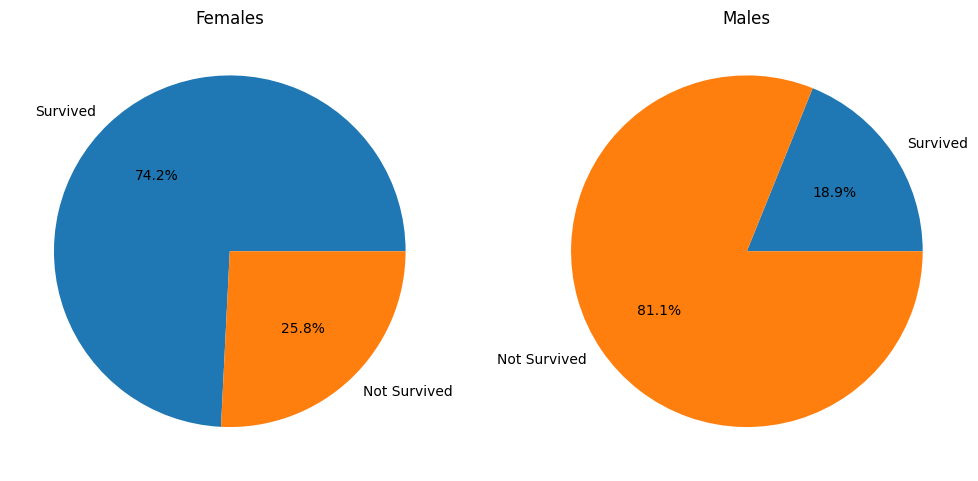

In [107]:
# Count of females who survived and did not survive
female_survived_count = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].shape[0]
female_not_survived_count = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)].shape[0]

# Count of males who survived and did not survive
male_survived_count = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0]
male_not_survived_count = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)].shape[0]

print("Count of females who survived:", female_survived_count)
print("Count of females who did not survive:", female_not_survived_count)
print("--------------------------------------------")
print("Count of males who survived:", male_survived_count)
print("Count of males who did not survive:", male_not_survived_count)

# plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels = ['Survived', 'Not Survived']
sizes = [female_survived_count, female_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Females')

# Pie plot for males
plt.subplot(1, 2, 2)
sizes = [male_survived_count, male_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Males')

plt.tight_layout()
plt.show()

>*  Female survived `74.2%` and male `18.9%`
>*  Female non survived `25.8%` and male `81.9%`

## ***4.4 : Age***

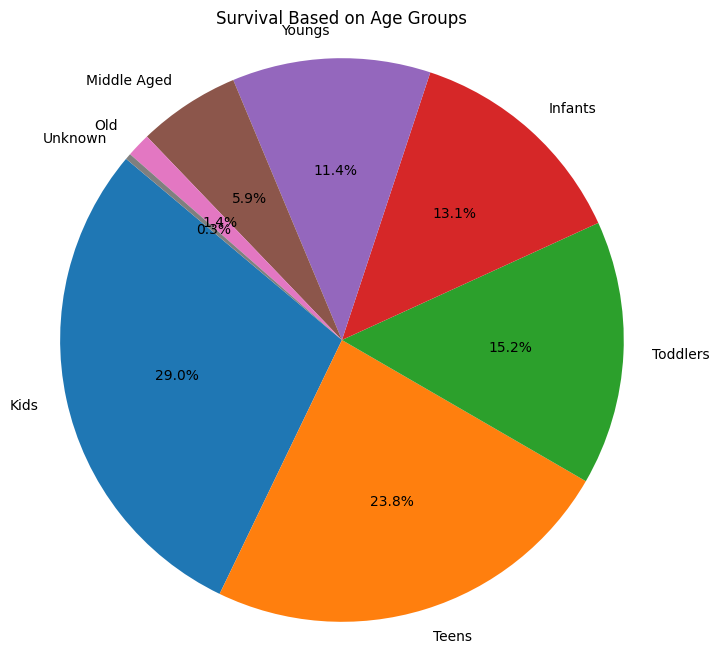

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train contains the necessary data

# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']  # Add 'Unknown' for values outside the defined bins
# Categorize ages into groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)

# Count survivors in each age group
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()
# test data
# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']  # Add 'Unknown' for values outside the defined bins
# Categorize ages into groups
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

# Count survivors in each age group
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(survivors_by_age_group, labels=survivors_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Based on Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


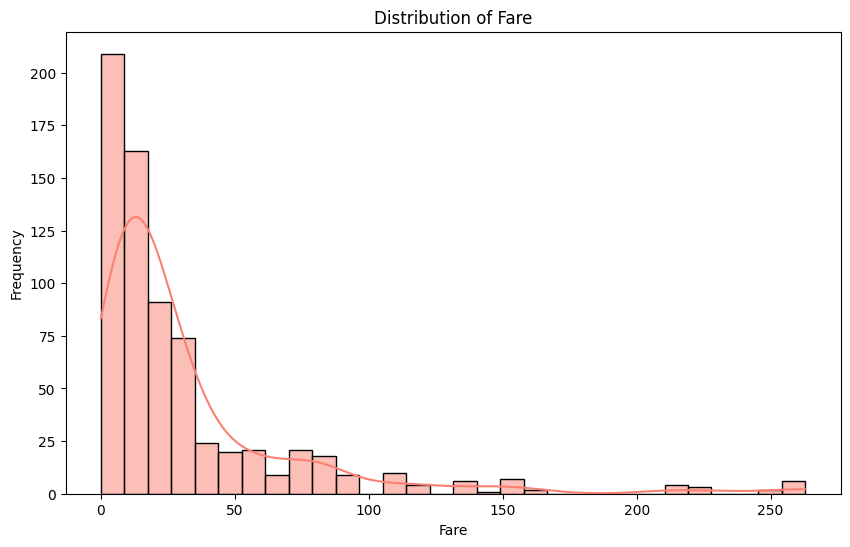

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Fare'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

## ***4.5 : SibSp***

In [109]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


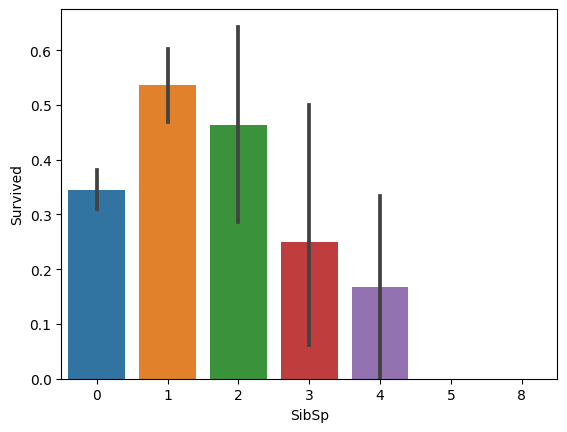

In [110]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df_train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", df_train["Survived"][df_train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", df_train["Survived"][df_train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


>* It's clear that people with more siblings or spouses aboard were less likely to survive.

## ***4.6 : Embarked***

<Figure size 800x600 with 0 Axes>

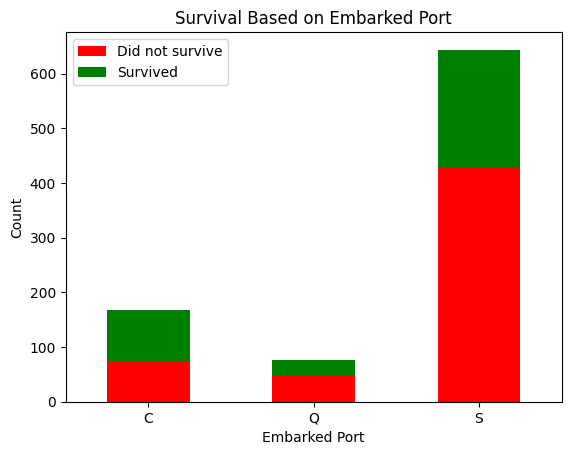

In [111]:
# Grouping data by 'Embarked' and 'Survived', and calculating the count of passengers
survivors_by_embarked = df_train.groupby(['Embarked', 'Survived']).size().unstack()

# Plot
plt.figure(figsize=(8, 6))
survivors_by_embarked.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Based on Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.show()

In [112]:
# Assuming df_train contains the necessary data

# Count survivors based on embarked port
survived_by_embarked = df_train[df_train['Survived'] == 1]['Embarked'].value_counts()

print("Survived based on embarked port:")
print(survived_by_embarked)
print("-------------------------------------")
# Count non-survivors based on embarked port
non_survived_by_embarked = df_train[df_train['Survived'] == 0]['Embarked'].value_counts()

print("Non-survival based on embarked port:")
print(non_survived_by_embarked)


Survived based on embarked port:
S    217
C     93
Q     30
Name: Embarked, dtype: int64
-------------------------------------
Non-survival based on embarked port:
S    427
C     75
Q     47
Name: Embarked, dtype: int64


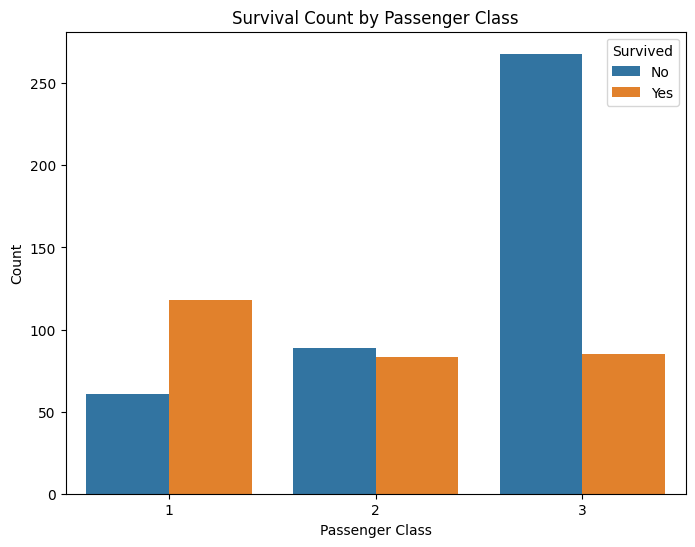

In [147]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

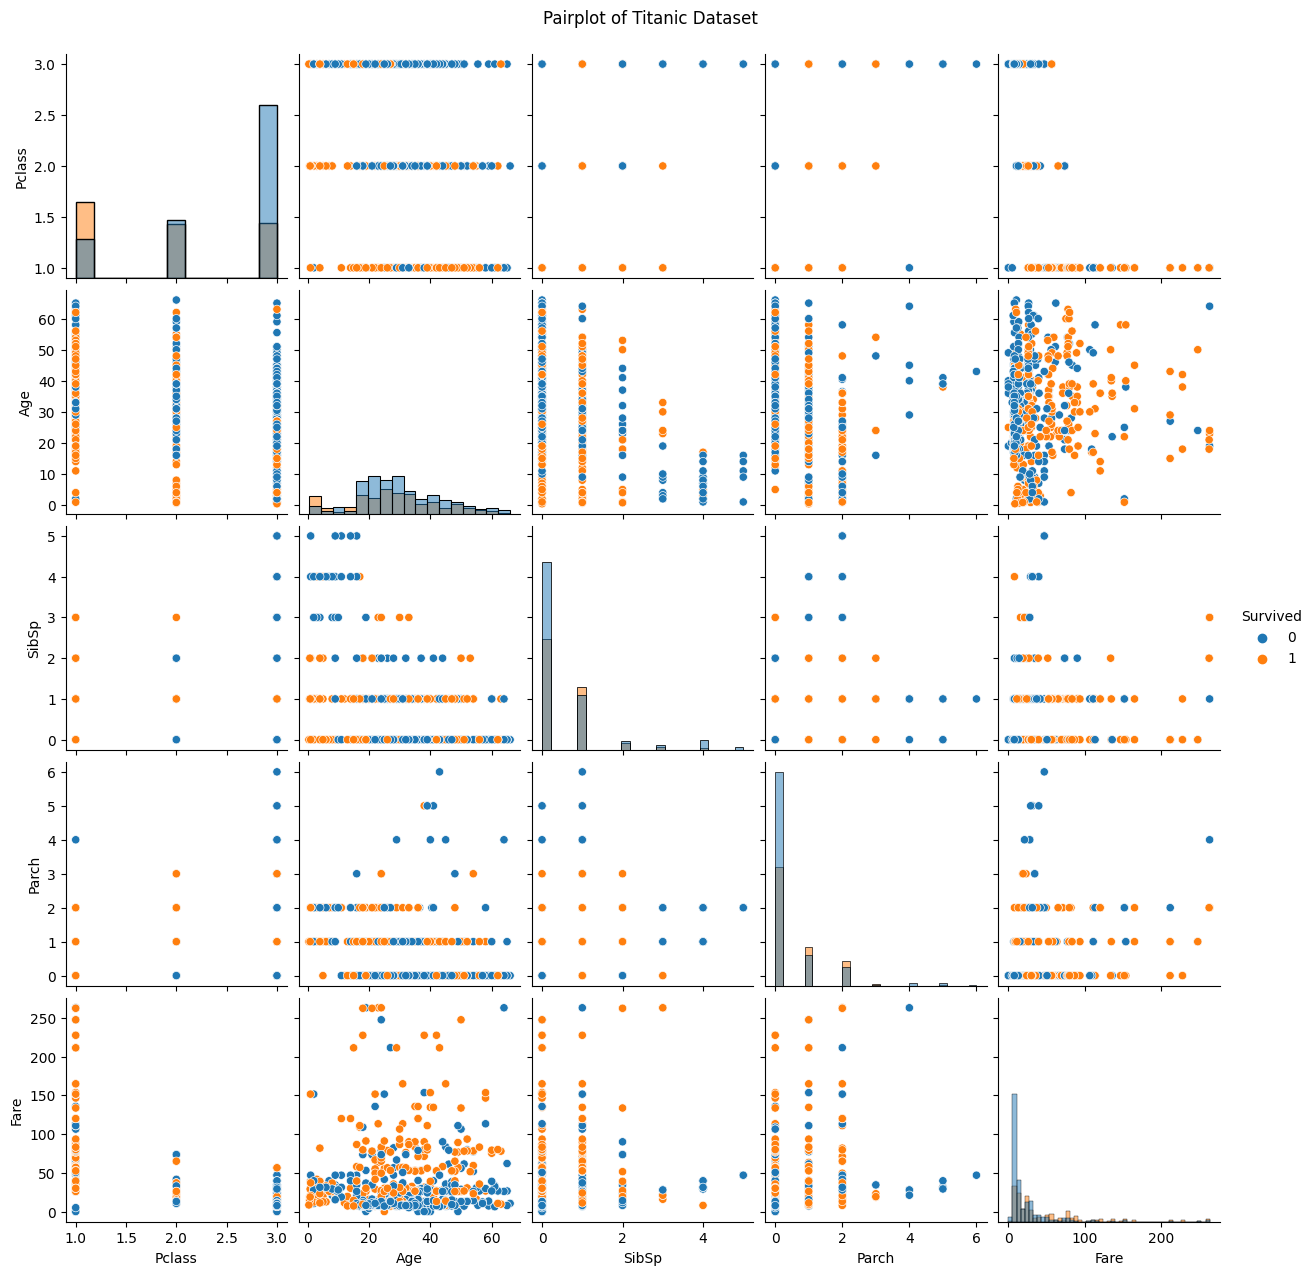

In [149]:
numeric_columns = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]



# Create pairplot
sns.pairplot(numeric_columns, hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Titanic Dataset', y=1.02)
plt.show()

>* Mostly people survived of `S = Southampton`
>* MOstly people non survived also `S = Southampton`

## ***4.7 : Fare***

In [113]:
# scatter plot age and fare base on survived in plotly
fig = px.scatter(df_train, x='Age', y='Fare', color='Survived', title='Age vs Fare')
fig.show()

<a id="miss"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 5 | Check Missing Values</span>


<Axes: >

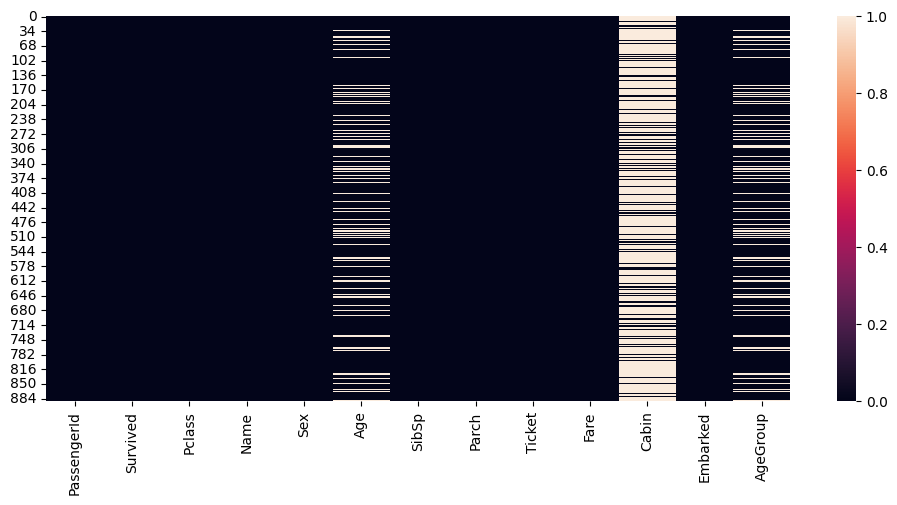

In [114]:
# check null values of train data by graphically

plt.figure(figsize=(12,5))
sns.heatmap(df_train.isnull())

<Axes: >

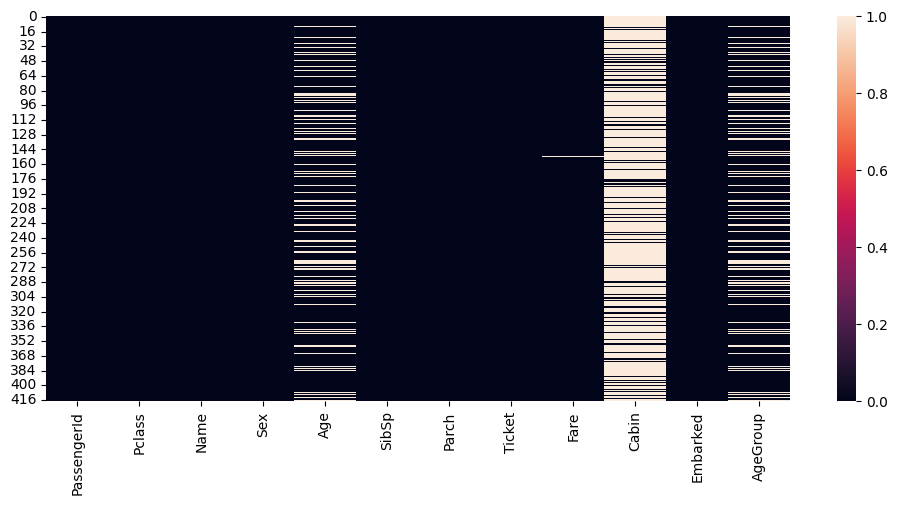

In [115]:
# check null values of test data by graphically

plt.figure(figsize=(12,5))
sns.heatmap(df_test.isnull())

In [116]:
# check null values in train data by using pandas
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
AgeGroup       177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

`IN TRAIN DATA`
>* `Cabin column` have `687` missing values
>* `Age column` have `177` missing values
>* `Embarkd column` have `2` missing values


In [117]:
# check null values in test data by using pandas
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
AgeGroup        86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

`IN TEST DATA`
>* `Cabin column` have `327` missing values
>* `Age column` have `86` missing values
>* `Fare column` have `1` missing values


In [118]:
# percentage of null values
percentage=(df_train.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

Cabin          77.104377
Age            19.865320
AgeGroup       19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [119]:
# percentage of null values
percentage=(df_test.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

Cabin          36.700337
Age             9.652076
AgeGroup        9.652076
Fare            0.112233
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

<a id="impute"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 6 | Impute Missing Values</span>

## `Train Data`

In [120]:
missing_data_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()
print("Columns  of missing values in train data :",missing_data_cols)

Columns  of missing values in train data : ['Age', 'Cabin', 'Embarked', 'AgeGroup']


In [121]:
# Cabin column  in train data have highest missing values so removed
df_train.drop('Cabin', axis=1, inplace=True)

In [144]:
# Age column  in train data has replace with mean value
#df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [145]:
# Embarked column  in train data has replace with mode value
#df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

> * `Cabin` have more than `50%` missing values in `train data` so removed from data

In [122]:
categorical_cols = ["Embarked",'AgeGroup']
bool_cols = []
numeric_cols = ["Age"]
missing_data_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()

In [123]:
df=df_train.copy()

In [124]:

# define the function to impute the missing values 

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [125]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:

        pass

Missing Values Age : 19.87%
MAE = 2.3775398601398603 

RMSE = 2.909641747875333 

R2 = 0.9543375227245633 

Missing Values Embarked : 0.22%
The feature 'Embarked' has been imputed with 88.2 accuracy

Missing Values AgeGroup : 19.87%
The feature 'AgeGroup' has been imputed with 94.41 accuracy



## `Test Data`

In [126]:
# Cabin column  in test data have highest missing values so removed
df_test.drop('Cabin', axis=1, inplace=True)

In [127]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
AgeGroup       86
dtype: int64

In [128]:
categorical_cols = []
bool_cols = []
numeric_cols = ["Age", "Fare"]
missing_data_cols = df_test.isnull().sum()[df_test.isnull().sum() > 0].index.tolist()


In [129]:
# df=df_test.copy()


In [130]:

# define the function to impute the missing values 

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [131]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df_test[col].isnull().sum() / len(df_test)) * 100, 2))+"%")
    if col in categorical_cols:
        df_test[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df_test[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values Age : 20.57%
MAE = 3.233023815642459 

RMSE = 4.104919239168084 

R2 = 0.9438836836740065 

Missing Values Fare : 0.24%
MAE = 13.328623351955303 

RMSE = 36.56866747021704 

R2 = 0.13581372376804612 

Missing Values AgeGroup : 20.57%


## ***All missing values imputed***

<a id="outlier"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 7 | Outliers</span>

`TRAIN DATA`

In [132]:
# Remove outliers from Age column in train data removed outliers greater than 70
df_train = df_train[df_train['Age'] < 70]
# remove outliers from Fare column in train data removed outliers greater than 500
df_train = df_train[df_train['Fare'] < 500]

<a id="ml"></a>
<span style="color: red; font-size: 250%; font-weight: bold;">Step 8 | Machine Learning</span>

##  ***8.1 : Features Selection***

>* `Name` ,`Ticket` and `AgeGroup` column are not necessary or valuable for train the model so removed

In [133]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,22.0,0,0,330911,7.2500,Q,Teens
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38.0,1,0,363272,71.2833,S,Youngs


In [134]:
df_train.drop(['Name','Ticket','AgeGroup'],axis=1,inplace=True)
df_test.drop(['Name','Ticket','AgeGroup'],axis=1,inplace=True)

In [135]:
# encode the categorical columns
le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtypes == 'object' or df_train[col].dtypes == 'category':
        df_train[col] = le.fit_transform(df_train[col])
# encode the categorical columns
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtypes == 'object' or df_test[col].dtypes == 'category':
        df_test[col] = le.fit_transform(df_test[col])

In [136]:
X = df_train.drop(['Survived','PassengerId'],axis=1)
y = df_train['Survived']

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

<a id="xg"></a>
##  ***8.2 : XGBClassifier***

In [138]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Define the pipeline with a scaler and the random forest classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

# Define the hyperparameters for grid search
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.5]
}

# Perform grid search using the pipeline and parameters
clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X_train, y_train)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)

# Print the results
print("Best XGBClassifier Model:")
print("Test Accuracy:", accuracy_best)
print("F1 Score:", f1)
print("Precision Score:", precision)
print("------------------------------------------")
print("Confusion Matrix:",conf_matrix)

Best XGBClassifier Model:
Test Accuracy: 0.8581560283687943
F1 Score: 0.803921568627451
Precision Score: 0.8723404255319149
------------------------------------------
Confusion Matrix: [[80  6]
 [14 41]]


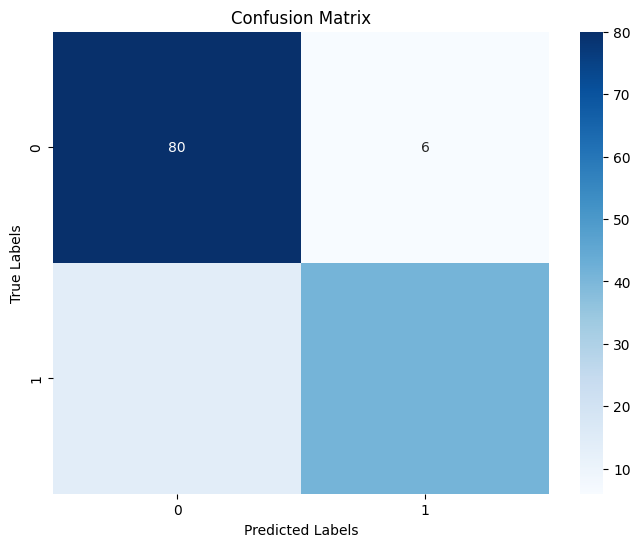

In [139]:
# make confusion plot for best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<a id="random"></a>
## ***8.3 : RandomForestClassifier***

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Define the pipeline with a scaler and the random forest classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters for grid search
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30]
}

# Perform grid search using the pipeline and parameters
clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X_train, y_train)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)

# Print the results
print("Best Random Forest Model:")
print("Test Accuracy:", accuracy_best)
print("F1 Score:", f1)
print("Precision Score:", precision)
print("------------------------------------------")
print("Confusion Matrix:",conf_matrix)



Best Random Forest Model:
Test Accuracy: 0.8297872340425532
F1 Score: 0.7599999999999999
Precision Score: 0.8444444444444444
------------------------------------------
Confusion Matrix: [[79  7]
 [17 38]]


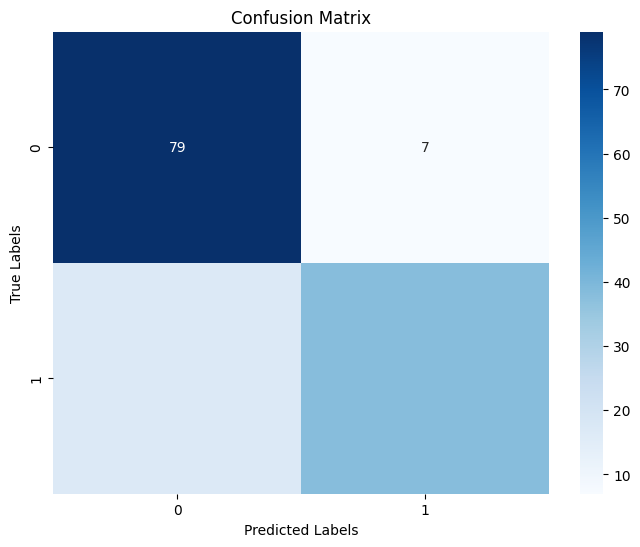

In [141]:
# create confusion plot for best model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<a id="deep"></a>

<span style="color: red; font-size: 250%; font-weight: bold;">Step 9 | Deep Learning</span>


## ***9.1 : Neural Network by TensorFlow***

Epoch 1/100


18/18 [==============================] - 1s 10ms/step - loss: 0.7001 - accuracy: 0.6536 - val_loss: 0.6488 - val_accuracy: 0.6383
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6909 - val_loss: 0.6538 - val_accuracy: 0.6170
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.7069 - val_loss: 0.6485 - val_accuracy: 0.6170
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.6980 - val_loss: 0.6275 - val_accuracy: 0.6950
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7016 - val_loss: 0.6462 - val_accuracy: 0.6170
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7123 - val_loss: 0.6299 - val_accuracy: 0.6809
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.7140 - val_loss: 0.6255 - val_accuracy: 0.6809
Epoch 8/100
18/18 [=====

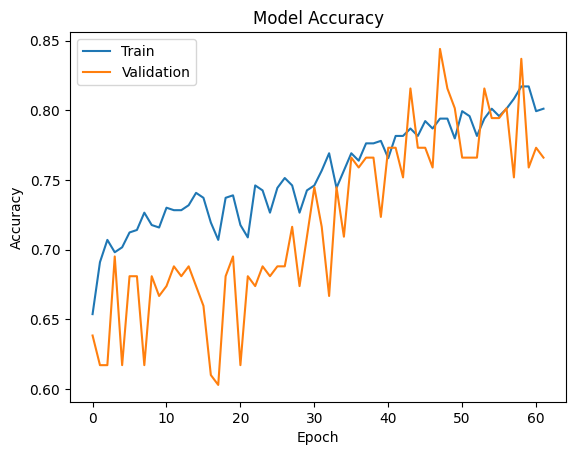

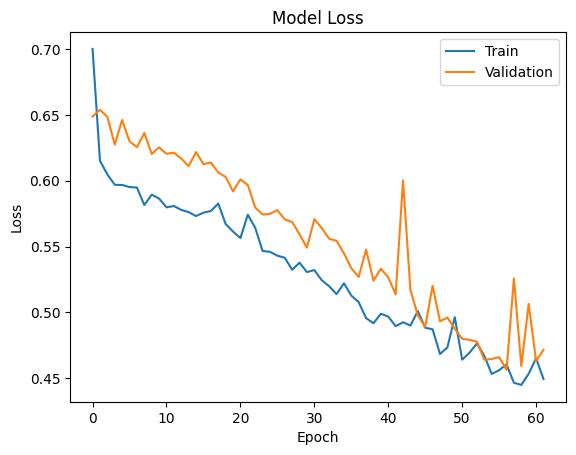

In [142]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined

model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),# input layer
    tf.keras.layers.Dense(32,activation='relu'),# hidden layer
    tf.keras.layers.Dense(16,activation='relu'),# hidden layer
    tf.keras.layers.Dense(8,activation='relu'),# hidden layer
    tf.keras.layers.Dense(1,activation='sigmoid')# output layer
])

# callback function
earlystop=tf.keras.callbacks.EarlyStopping(patience=5)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test,y_test), callbacks=[earlystop])

# evaluate the model
loss , accuracy = model.evaluate(X_test, y_test)

# print the accuracy
print("Test Accuracy: {:.2f}%".format(accuracy*100))

# print the loss
print("Test Loss: {:.2f}".format(loss))

# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


<a id="submission"></a>

<span style="color: red; font-size: 250%; font-weight: bold;">Step 10 | Submission</span>


In [143]:
#set ids as PassengerId and predict survival
ids = df_test['PassengerId']
predictions = best_model.predict(df_test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

**"If you've made it this far, congratulations, and thank you for taking the time to read! 😊 If you choose to utilize any section of this notebook in a published kernel, I would greatly appreciate credit—simply link back here. Your suggestions are invaluable, so please feel free to share them. Additionally, if you have any questions, don't hesitate to comment below. I'm eager to engage in further discussion and enhance the quality of this work. Thank you! 😊"**

<span style="color: red; font-size: 250%; font-weight: bold;">Best of Luck ❤️</span>